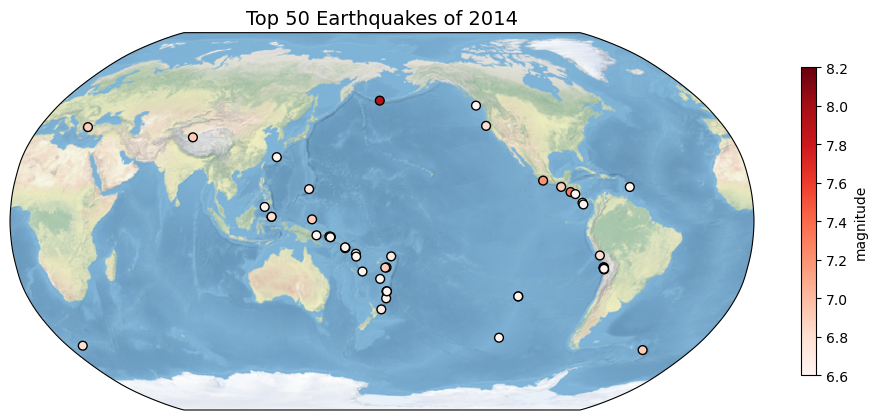

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
#1. 读取数据
df = pd.read_csv('usgs_earthquakes.csv')
#2. 数据清洗
df['mag'] = pd.to_numeric(df['mag'], errors='coerce')
#只删除 mag 为空的行，保留 magType 为空的数据
df = df.dropna(subset=['mag'])
df = df[df['mag'] >= 0]
#筛选 2014 年
df['time'] = pd.to_datetime(df['time'])
df = df[df['time'].dt.year == 2014]
df = df[df['latitude'] != -10.1229]
#3. 排序并提取 Top 50 
#'mag' (震级) -> False (从大到小)
#'time' (时间) -> True  (从旧到新 / 从早到晚)
top_50 = df.sort_values(by=['mag', 'time'], ascending=[False, True]).head(50)
#4. 可视化绘图
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.stock_img()
sc = ax.scatter(
x=top_50['longitude'],
y=top_50['latitude'],
c=top_50['mag'],
cmap='Reds',
s=40,
edgecolors='black',
transform=ccrs.PlateCarree(),
alpha=1.0,
vmin=6.6,
vmax=8.2
)
plt.title('Top 50 Earthquakes of 2014', fontsize=14)
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('magnitude')
plt.show()

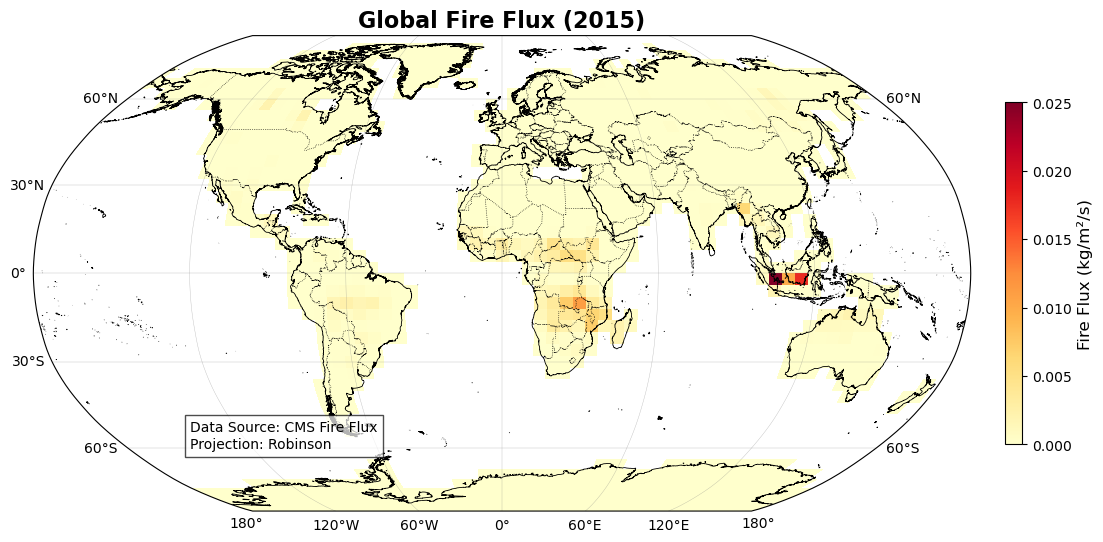

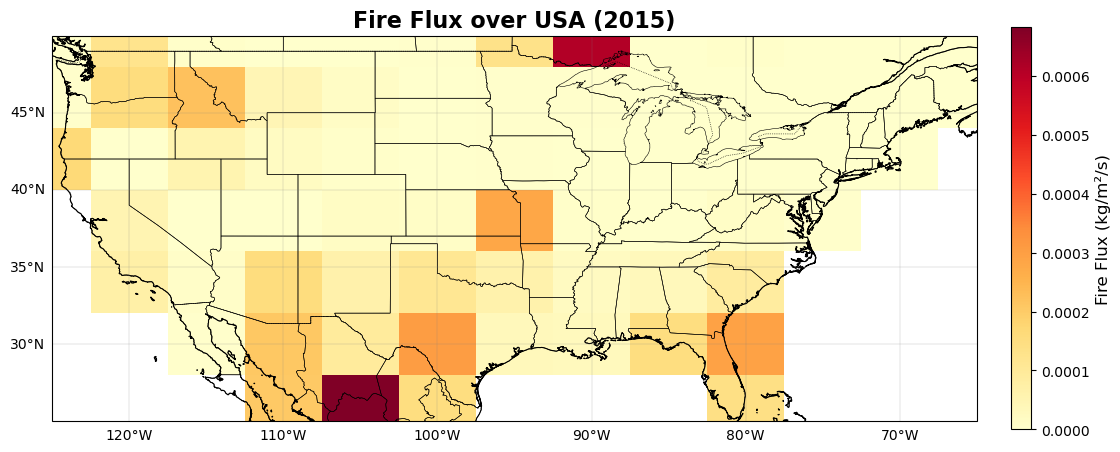

In [33]:
import xarray as xr

# 打开 NetCDF 文件
ds = xr.open_dataset("CMS_Flux_Fire_2010_2016_merged.nc")
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.set_global()

# 高分辨率边界
ax1.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.6)
ax1.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':', linewidth=0.5)

# 网格线
gl = ax1.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False

# 绘制数据
p1 = flux_2015.plot.pcolormesh(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap="YlOrRd",
    shading="auto",
    add_colorbar=False,
    add_labels=False,
    vmin=0,
    vmax=0.025
)

# 自定义色条
cbar = plt.colorbar(p1, ax=ax1, orientation='vertical', shrink=0.6, pad=0.03)
cbar.set_label("Fire Flux (kg/m²/s)", fontsize=12)

# 标题与文本框
ax1.set_title("Global Fire Flux (2015)", fontsize=16, weight='bold')
ax1.text(-150, -60, "Data Source: CMS Fire Flux\nProjection: Robinson", transform=ccrs.PlateCarree(),
         fontsize=10, bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))

plt.tight_layout()
plt.show()
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. 打开数据集
ds = xr.open_dataset("CMS_Flux_Fire_2010_2016_merged.nc")

# 2. 提取 flux 并计算 2015 年平均
flux_2015 = ds['flux'].sel(time=slice("2015-01-01", "2015-12-31")).mean(dim="time")

# 3. 裁剪美国区域
flux_us = flux_2015.sel(lon=slice(-125, -65), lat=slice(25, 50))

# 4. 绘制地图
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())

# 添加地理特征
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.8)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':', linewidth=0.5)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.4)

# 添加网格线
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False

# 绘制火灾通量分布
p = flux_us.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="YlOrRd",
    shading="auto",
    add_colorbar=False,
    add_labels=False
)

# 自定义色条
cbar = plt.colorbar(p, ax=ax, orientation='vertical', shrink=0.6, pad=0.03)
cbar.set_label("Fire Flux (kg/m²/s)", fontsize=12)

# 添加标题
ax.set_title("Fire Flux over USA (2015)", fontsize=16, weight='bold')

plt.tight_layout()
plt.show()


